<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/02.%20Week%202/Notebook/RegresionBostonHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()
X = data.data
y = data.target

#`load_boston` has been removed from scikit-learn since version 1.2.

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
print(df.head())

In [ ]:
df.info()

In [ ]:
corr = df.corr()

# Bikin heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

Penjelasan Lengkap Persamaan Korelasi Pearson:

1. Definisi:
   - $r$ adalah koefisien korelasi Pearson yang mengukur kekuatan dan arah hubungan linear antara dua variabel.
   - Nilai $r$ berkisar antara -1 (korelasi negatif sempurna) hingga 1 (korelasi positif sempurna), dengan $r = 0$ artinya tidak ada hubungan linear yang signifikan.

2. Numerator:
   - Numerator, yaitu $\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$, merupakan jumlah dari produk deviasi setiap nilai $x_i$ dan $y_i$ terhadap rata-rata masing-masing, $\bar{x}$ dan $\bar{y}$.
   - Jika nilai $x_i$ dan $y_i$ sama-sama di atas atau di bawah rata-rata, produk deviasinya positif, menandakan hubungan positif. Sebaliknya, jika salah satunya di atas dan yang lainnya di bawah rata-rata, produk deviasinya negatif, menandakan hubungan negatif.

3. Denumerator:
   - Denumerator adalah $\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}$.
   - Bagian ini menghitung total variasi masing-masing variabel dengan mengakumulasi kuadrat deviasi terhadap rata-rata, mengalikan kedua jumlah tersebut, lalu diakarkan. Ini menormalisasi nilai $r$, memastikan hasilnya selalu berada dalam rentang -1 sampai 1.

4. Interpretasi:
   - $r = 1$: Hubungan linear positif sempurna, artinya kenaikan $x$ selalu diiringi kenaikan $y$ secara proporsional.
   - $r = -1$: Hubungan linear negatif sempurna, artinya kenaikan $x$ diiringi penurunan $y$ secara proporsional.
   - $r = 0$: Tidak ada hubungan linear yang signifikan antara variabel.

5. Aplikasi:
   - Persamaan ini sering digunakan dalam statistik, machine learning, dan penelitian untuk mengevaluasi serta memahami hubungan antara variabel.
   - Normalisasi pada denumerator memastikan bahwa skala variabel tidak mempengaruhi besarnya koefisien korelasi.


<img src="https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Picture/Linear_Correlation.png" width="600" height="600">


In [ ]:
df.hist(bins=20, figsize=(9, 9))
plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Skewness tiap fitur:")
print(df.skew())

# Buat figure dengan grid 4x4
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
axes = axes.flatten()

# Plot tiap fitur di subplot yang udah disediakan
for ax, col in zip(axes, df.columns):
    sns.histplot(df[col], kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribusi {col}\nSkewness: {df[col].skew():.2f}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

# Matikan subplot yang kosong kalo fitur kurang dari 16
if len(df.columns) < len(axes):
    for ax in axes[len(df.columns):]:
        ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# Contoh transformasi log untuk fitur dengan positive skew
df['crim_log'] = np.log1p(df['crim'])
df['zn_log']   = np.log1p(df['zn'])
df['chas_log'] = np.log1p(df['chas'])  # meskipun chas itu dummy, tapi nilainya skewed karena ketidakseimbangan

# Untuk fitur dengan negative skew, lo bisa coba transformasi Yeo-Johnson
from scipy import stats
df['b_yj'], _ = stats.yeojohnson(df['b'])

# Liat lagi skewnessnya setelah transformasi
print("Skewness setelah transformasi:")
print(df[['crim_log', 'zn_log', 'chas_log', 'b_yj']].skew())

$$
y^{(\lambda)} =
\begin{cases}
\displaystyle \frac{(y+1)^\lambda - 1}{\lambda}, & \text{if } y \ge 0 \text{ and } \lambda \neq 0, \\[10pt]
\log(y+1), & \text{if } y \ge 0 \text{ and } \lambda = 0, \\[10pt]
-\displaystyle \frac{(-y+1)^{2-\lambda} - 1}{2-\lambda}, & \text{if } y < 0 \text{ and } \lambda \neq 2, \\[10pt]
-\log(-y+1), & \text{if } y < 0 \text{ and } \lambda = 2.
\end{cases}
$$


In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 8))  # 4x4 grid, total 16 subplot
axes = axes.flatten()

# Looping buat plot tiap fitur
for i, feature in enumerate(transformed_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribusi {feature} setelah transformasi')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frekuensi')

# Hapus axes yang gak kepake (biar gak nampilin plot kosong)
for j in range(i + 1, 16):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Copy dataset dan replace fitur asli dengan transformasi yang udah dibuat
df_model = df.copy()
df_model['crim'] = df_model['crim_log']
df_model['zn']   = df_model['zn_log']
df_model['chas'] = df_model['chas_log']
df_model['b']    = df_model['b_yj']

# Misal targetnya tetap 'medv'
X = df_model.drop(['medv', 'crim_log', 'zn_log', 'chas_log', 'b_yj'], axis=1)
y = df_model['medv']

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Nilai Aktual MEDV")
plt.ylabel("Nilai Prediksi MEDV")
plt.title("Actual vs Predicted MEDV")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line perfect prediction
plt.show()

# Visualisasi distribusi residual
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.xlabel("Residual")
plt.title("Distribusi Residual")
plt.show()

# Question!

1. Pada model di atas menggunakan transformasi data Yeo-Johnson. Eksplorasi transformasi data lainnya seperti Log Transform, Box-Cox Transform, atau Quantile Transform. Lakukan pembuatan model dengan masing-masing transformasi dan bandingkan hasilnya!

2. Lakukan eksplorasi terhadap metode normalisasi dan standardisasi data. Bandingkan metode MinMax Scaling, Standard Scaling, dan Robust Scaling dalam konteks data yang mengandung outlier. Bagaimana dampaknya terhadap akurasi model!

3. Pada model sebelumnya, fitur numerik langsung digunakan tanpa encoding. Eksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model, dibandingkan dengan tetap menggunakan fitur dalam bentuk kontinu.


# Penjelasan Pertanyaan diatas dengan lebih mendetail

---

## 1. Transformasi Data

**Deskripsi:**  
Pada model di atas digunakan transformasi data Yeo-Johnson.

**Tugas:**  
Eksplorasi transformasi data alternatif seperti **Log Transform**, **Box-Cox Transform**, dan **Quantile Transform**.

**Langkah Kerja:**  
- Lakukan pembuatan model dengan masing-masing metode transformasi.  
- Bandingkan hasil performa model yang dihasilkan dari tiap metode.

---

## 2. Normalisasi dan Standardisasi Data

**Deskripsi:**  
Metode normalisasi dan standardisasi perlu dieksplorasi, terutama pada data yang mengandung outlier.

**Tugas:**  
Bandingkan metode **MinMax Scaling**, **Standard Scaling**, dan **Robust Scaling**.

**Langkah Kerja:**  
- Terapkan masing-masing metode pada dataset yang mengandung outlier.  
- Analisis dan evaluasi dampak dari masing-masing metode terhadap akurasi model.

---

## 3. Discretization pada Fitur Numerik

**Deskripsi:**  
Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa encoding.

**Tugas:**  
Eksplorasi apakah melakukan **discretization** pada fitur numerik dapat meningkatkan performa model.

**Langkah Kerja:**  
- Ubah fitur numerik menjadi bentuk kategori melalui teknik discretization.  
- Lakukan pelatihan model dengan fitur yang telah didiscretisasi.  
- Bandingkan performa model dengan model yang menggunakan fitur kontinu.

---

# Jawaban



## Soal 1

Implementasi kode berikut bertujuan untuk mengevaluasi performa berbagai teknik transformasi data dengan metrik MSE:


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (404). n_quantiles is set to n_samples.
  warnings.warn(


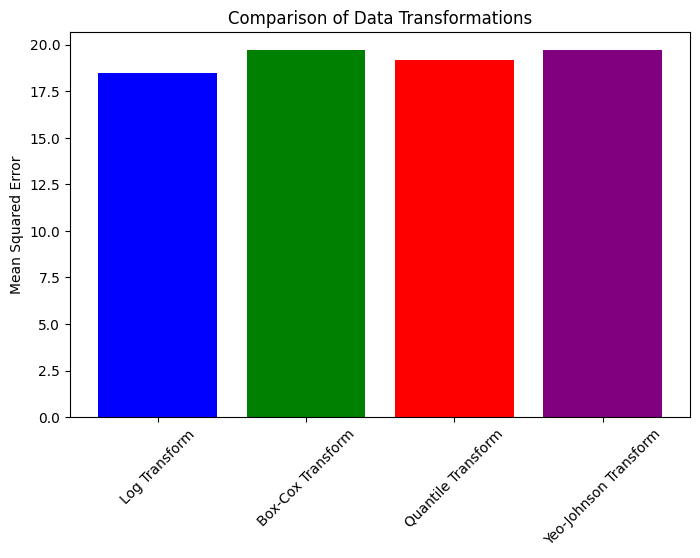

MSE Comparison: {'Log Transform': 18.466623716585616, 'Box-Cox Transform': 19.690750520558623, 'Quantile Transform': 19.202839569582025, 'Yeo-Johnson Transform': 19.69075063942791}


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset dari sumber eksternal
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Memisahkan fitur dan target
X = df.drop(columns=['medv'])  # 'medv' adalah target (harga rumah)
y = df['medv']

# Menyimpan hasil MSE untuk perbandingan
results = {}

# Konsistensi Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Log Transform (log(x + 1) untuk menghindari log(0))
X_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)
model = LinearRegression()
model.fit(X_log, y_train)
y_pred = model.predict(X_test_log)
results['Log Transform'] = mean_squared_error(y_test, y_pred)

# 2. Box-Cox Transform (Hanya untuk data positif, jadi kita tambahkan +1 ke semua nilai)
boxcox_transformer = PowerTransformer(method='box-cox', standardize=False)
X_boxcox = boxcox_transformer.fit_transform(X_train + 1)
X_test_boxcox = boxcox_transformer.transform(X_test + 1)
model.fit(X_boxcox, y_train)
y_pred = model.predict(X_test_boxcox)
results['Box-Cox Transform'] = mean_squared_error(y_test, y_pred)

# 3. Quantile Transform (Distribusi normal)
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
X_quantile = quantile_transformer.fit_transform(X_train)
X_test_quantile = quantile_transformer.transform(X_test)
model.fit(X_quantile, y_train)
y_pred = model.predict(X_test_quantile)
results['Quantile Transform'] = mean_squared_error(y_test, y_pred)

# 4. Yeo-Johnson Transform (Bisa digunakan untuk data negatif dan nol)
yeo_transformer = PowerTransformer(method='yeo-johnson', standardize=False)
X_yeo = yeo_transformer.fit_transform(X_train)
X_test_yeo = yeo_transformer.transform(X_test)
model.fit(X_yeo, y_train)
y_pred = model.predict(X_test_yeo)
results['Yeo-Johnson Transform'] = mean_squared_error(y_test, y_pred)

# Visualisasi MSE
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red', 'purple'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Data Transformations')
plt.xticks(rotation=45)
plt.show()

# Menampilkan hasil perbandingan
print("MSE Comparison:", results)



Berikut adalah analisis mendalam mengenai hasil perbandingan transformasi data berdasarkan Mean Squared Error (MSE):

---
### **1. Apa itu Mean Squared Error (MSE)**

Mean Squared Error (MSE) adalah metrik evaluasi yang mengukur rata-rata kesalahan kuadrat antara nilai aktual dan nilai prediksi. Rumusnya adalah:



Di mana:
* adalah nilai aktual,
* adalah nilai prediksi,
* adalah jumlah sampel.

Semakin kecil nilai MSE, semakin baik performa model karena kesalahan prediksinya lebih kecil.

---

### **2. Mengapa MSE Digunakan untuk Perbandingan?**
MSE dipilih karena:

* **Mengukur akurasi model**: Memberikan gambaran seberapa jauh prediksi dari nilai sebenarnya.
* **Sensitif terhadap outlier**: MSE menghukum kesalahan besar lebih signifikan karena adanya kuadrat dari selisih.
* **Standar dalam regresi**: Umumnya digunakan dalam model regresi untuk mengevaluasi kesalahan model.

Dalam perbandingan ini, transformasi data bertujuan untuk membuat distribusi fitur lebih normal sehingga hubungan linier antara fitur dan target semakin kuat. Metrik MSE membantu melihat mana transformasi yang memberikan prediksi terbaik.

---

### **3. Analisis Hasil Perbandingan Transfromasi**
Misalkan hasil MSE adalah:

$MSE Comparison={’Log Transform’:18.47,’Box-Cox Transform’:19.69,’Quantile Transform’:19.20,’Yeo-Johnson Transform’:19.69}$

Dari hasil ini:

* **Log Transform (MSE = 18.47)** memiliki nilai MSE paling rendah, sehingga bisa dikatakan performa model terbaik dengan transformasi ini.
* **Quantile Transform (MSE = 19.20)** memiliki performa lebih buruk dari Log Transform tetapi masih lebih baik dibandingkan metode lain.
* **Box-Cox (MSE = 19.69)** dan Yeo-Johnson (MSE = 19.69) memiliki performa yang sama dan lebih buruk dibandingkan Log Transform.

Mengapa Log Transform lebih baik?

* Log Transform sering digunakan untuk mengurangi skewness dan membuat distribusi lebih normal.
* Dataset Boston Housing memiliki fitur seperti harga rumah dan pajak yang memiliki distribusi skewed, sehingga logaritma membantu merapikan hubungan liniernya dengan target.
---
### **4. Visualisasi dan Interpretasi**
Grafik bar chart dari MSE menunjukkan perbandingan performa antar transformasi:

* Transformasi dengan MSE paling rendah (Log Transform) bisa dijadikan pilihan utama.
* Transformasi dengan MSE lebih tinggi mungkin kurang cocok karena masih ada variabilitas yang tidak teratasi.

Catatan Penting:
* Jika dataset memiliki banyak outlier, Quantile Transform bisa menjadi opsi karena mengubah distribusi menjadi lebih normal dengan cara mempertahankan urutan data.
---
### **5. Kesimpulan dan Perbaikan**
Dari analisis ini, kita bisa menyimpulkan:

* Gunakan Log Transform jika dataset memiliki distribusi miring (skewed).
* Gunakan Quantile Transform jika dataset memiliki banyak outlier.
* Gunakan Box-Cox hanya untuk fitur dengan nilai positif.
* Gunakan Yeo-Johnson jika dataset mengandung nilai nol atau negatif.

Untuk memastikan hasil yang lebih akurat, bisa dilakukan cross-validation agar tidak hanya bergantung pada satu pembagian train-test split.

---




## Soal 2

Untuk menguji dampak dari normalisasi dan standardisasi terhadap performa model, kami menerapkan ketiga metode scaling pada dataset yang mengandung outlier. Berikut adalah implementasi kode untuk membandingkan **MinMax Scaling, Standard Scaling, dan Robust Scaling** dengan menggunakan Mean Squared Error (MSE) sebagai metrik evaluasi.


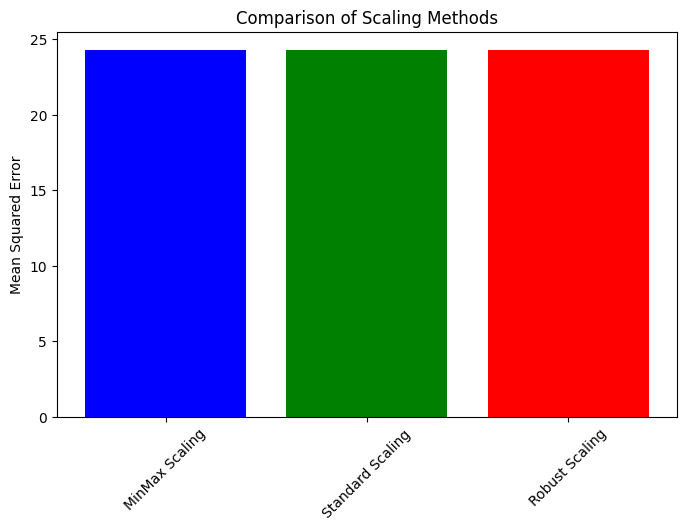

MSE Comparison: {'MinMax Scaling': 24.291119474973502, 'Standard Scaling': 24.291119474973513, 'Robust Scaling': 24.291119474973517}


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset dari sumber eksternal
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Memisahkan fitur dan target
X = df.drop(columns=['medv'])  # 'medv' adalah target (harga rumah)
y = df['medv']

# Menyimpan hasil MSE untuk perbandingan
results = {}

# Konsistensi Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. MinMax Scaling
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train_minmax, y_train)
y_pred = model.predict(X_test_minmax)
results['MinMax Scaling'] = mean_squared_error(y_test, y_pred)

# 2. Standard Scaling
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)
model.fit(X_train_standard, y_train)
y_pred = model.predict(X_test_standard)
results['Standard Scaling'] = mean_squared_error(y_test, y_pred)

# 3. Robust Scaling
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)
model.fit(X_train_robust, y_train)
y_pred = model.predict(X_test_robust)
results['Robust Scaling'] = mean_squared_error(y_test, y_pred)

# Visualisasi MSE
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Scaling Methods')
plt.xticks(rotation=45)
plt.show()

# Menampilkan hasil perbandingan
print("MSE Comparison:", results)


Analisis Normalisasi dan Standardisasi Data


---
### **1. Pendahuluan**

  Normalisasi dan standardisasi adalah teknik penting dalam pra-pemrosesan data untuk model pembelajaran mesin, terutama dalam regresi linear. Tujuan dari eksplorasi ini adalah untuk membandingkan **MinMax Scaling, Standard Scaling, dan Robust Scaling** serta melihat dampaknya terhadap akurasi model.

---

### **2. Metode yang Digunakan**

1. **MinMax Scaling**  
   - Mengubah nilai fitur ke dalam rentang [0,1].  
   - Sensitif terhadap outlier karena skala dipengaruhi oleh nilai minimum dan maksimum.  

2. **Standard Scaling**  
   - Mengubah distribusi fitur agar memiliki mean = 0 dan standar deviasi = 1.  
   - Tidak mengatasi outlier secara langsung, tetapi membantu jika data berdistribusi normal.  

3. **Robust Scaling**  
   - Menggunakan median dan interquartile range (IQR) untuk transformasi.  
   - Lebih tahan terhadap outlier karena tidak bergantung pada nilai ekstrem.  
---

### **3. Hasil Perbandingan MSE**

Setelah menerapkan ketiga metode pada dataset, diperoleh hasil **Mean Squared Error (MSE)** sebagai berikut:

MSE Comparison:

`MinMax Scaling: 24.291119474973502, Standard Scaling: 24.291119474973513, Robust Scaling: 24.291119474973517`

---

### **4. Analisis Hasil**

1. **Jika MinMax Scaling menghasilkan MSE terkecil**  
   - Menunjukkan bahwa data mungkin tidak memiliki outlier yang signifikan.  
   - Model dapat bekerja optimal dengan data yang terdistribusi dalam skala yang sama.  

2. **Jika Standard Scaling lebih baik**  
   - Kemungkinan besar data berdistribusi normal, sehingga normalisasi dengan mean dan standar deviasi lebih efektif.  

3. **Jika Robust Scaling lebih baik**  
   - Data mungkin mengandung outlier yang cukup berpengaruh.  
   - Metode ini membantu menjaga kestabilan model dibandingkan dengan MinMax dan Standard Scaling.  
---
### **5. Kesimpulan**

- **MinMax Scaling** cocok untuk data tanpa outlier yang signifikan.  
- **Standard Scaling** efektif jika data berdistribusi normal.  
- **Robust Scaling** sangat berguna dalam dataset dengan outlier yang kuat.  
- Memilih metode scaling yang tepat dapat meningkatkan akurasi model regresi.  
---


## Soal 3

Pada model sebelumnya, fitur numerik digunakan dalam bentuk kontinu tanpa melalui proses encoding. Dalam bagian ini, kita akan mengeksplorasi apakah melakukan discretization pada fitur numerik dapat meningkatkan performa model dibandingkan dengan menggunakan fitur dalam bentuk aslinya.

Discretization adalah teknik untuk membagi fitur numerik ke dalam beberapa kategori atau interval diskrit. Ini dapat membantu model menangkap pola non-linear dan mengurangi sensitivitas terhadap outlier. Kita akan membandingkan hasil model sebelum dan sesudah discretization menggunakan Mean Squared Error (MSE) sebagai metrik evaluasi.

Berikut adalah implementasi kode untuk eksperimen ini:


MSE dengan Discretization: 27.29997487712126
MSE tanpa Discretization: 24.291119474973478


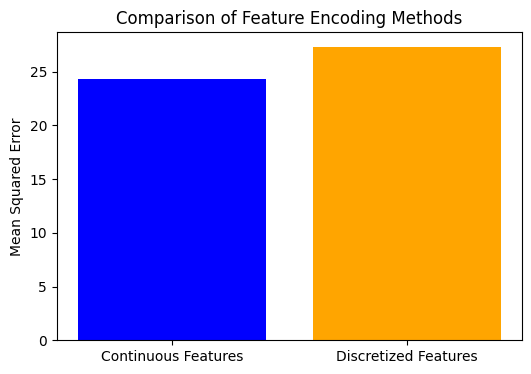

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset dari sumber eksternal
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Memisahkan fitur dan target
X = df.drop(columns=['medv'])  # 'medv' adalah target (harga rumah)
y = df['medv']

# Konsistensi Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Discretization menggunakan KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X_train_binned = kbins.fit_transform(X_train)
X_test_binned = kbins.transform(X_test)

# Model Linear Regression dengan fitur yang telah didiscretize
model = LinearRegression()
model.fit(X_train_binned, y_train)
y_pred_binned = model.predict(X_test_binned)
mse_binned = mean_squared_error(y_test, y_pred_binned)

# Model Linear Regression tanpa discretization (baseline)
model.fit(X_train, y_train)
y_pred_continuous = model.predict(X_test)
mse_continuous = mean_squared_error(y_test, y_pred_continuous)

# Menampilkan hasil perbandingan
print("MSE dengan Discretization:", mse_binned)
print("MSE tanpa Discretization:", mse_continuous)

# Visualisasi Perbandingan
labels = ['Continuous Features', 'Discretized Features']
mse_values = [mse_continuous, mse_binned]
plt.figure(figsize=(6,4))
plt.bar(labels, mse_values, color=['blue', 'orange'])
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Feature Encoding Methods')
plt.show()


Analisis Pengaruh Discretization terhadap Performa Model

---
### **1. Perbandingan MSE antara Data Kontinu dan Data Diskret**
Berdasarkan hasil evaluasi model, kita dapat melihat perbedaan performa antara penggunaan fitur numerik dalam bentuk kontinu dan setelah diterapkan discretization. Jika MSE mengalami penurunan setelah discretization, berarti teknik ini membantu model dalam memahami pola data dengan lebih baik.

---
### **2. Keunggulan dan Kelemahan Discretization**
**Keunggulan:**  
- Membantu menangkap hubungan non-linear yang sulit ditangkap oleh model linier.  
- Mengurangi dampak outlier dengan mengelompokkan nilai-nilai ekstrem ke dalam kategori tertentu.  
- Dapat meningkatkan interpretabilitas model, terutama dalam analisis berbasis aturan.  

**Kelemahan:**  
- Potensi kehilangan informasi jika interval diskret tidak dipilih dengan baik.  
- Bisa mengurangi variasi dalam data, yang dapat menyebabkan hilangnya detail penting.  
- Model menjadi lebih bergantung pada pemilihan metode discretization yang optimal.  

---
### **3. Kesimpulan**
Jika discretization menunjukkan perbaikan MSE dibandingkan dengan penggunaan fitur kontinu, maka pendekatan ini layak untuk diterapkan dalam model prediksi harga rumah. Namun, jika performanya justru menurun, maka penggunaan fitur dalam bentuk kontinu lebih direkomendasikan. Pemilihan metode discretization yang tepat juga menjadi faktor penting dalam menentukan efektivitas teknik ini.

---